### Ajuste de datos para obtener ganancia de antena y apertura angular

La propuesta para tarea es: considerar los datos que se tienen de antenas comerciales para determinar el valor de ganancia que tendría una antena con diámetro de 50 metros.

Para ello sería posible emplear una extrapolación:

In [60]:
import numpy as np
import matplotlib.pyplot as plt

#Datos de antenas
D = np.array([0.98 , 1.2 , 1.8]) # Diametro de antenas (m)
G_dB = np.array([39.8 , 41.5 , 45.3]) # Ganancia de antenas (dBi)
A = np.array([1.8 , 1.4 , 1]) # Apertura de antenas (°)


Recordar que la ganacia se encuentra en escala logarítmica, será necesario convertir a escala antilogarítmica.

In [61]:
# Definicion de funciones para cambiar de escalas

def dB2l(dB):  # Convertir de dB a lineal
    return np.power(10,dB/10) 

def l2dB(l):  # Convertir de lineal a dB
    return 10*np.log10(l)

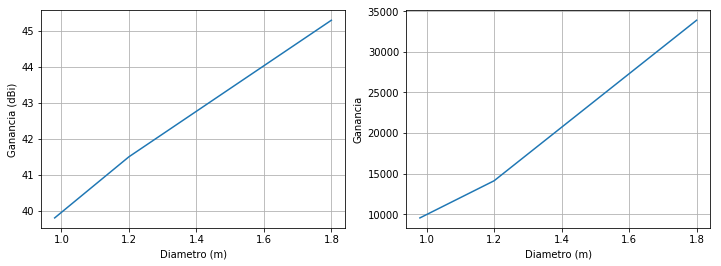

In [62]:
G_l = dB2l(G_dB)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(D,G_dB)
plt.ylabel("Ganancia (dBi)")
plt.xlabel("Diametro (m)")
plt.grid(b=True,which='both',axis='both')

plt.subplot(1,2,2)
plt.plot(D,G_l)
plt.ylabel("Ganancia")
plt.xlabel("Diametro (m)")
plt.grid(b=True,which='both',axis='both')

plt.show()

Considerando que uno de los factores que incide en la ganancia de antena es el área de la antena, la cual varía al cuadrado del radio o del diámetro. Se debe considerar un ajuste de orden 2.

In [63]:
poly_G = np.polyfit(D,G_l,2) # funcion de ajuste polinomial de orden 2
print(u"Ecuacion de ajuste de datos: ({:.2f}*x^2) + ({:.2f}*x) + ({:.2f}) ".format(poly_G[0],poly_G[1],poly_G[2]))

Ecuacion de ajuste de datos: (14797.85*x^2) + (-11461.81*x) + (6570.65) 


In [64]:
G_l_p = np.poly1d(poly_G) # Operación para extrapolación
D_GTM = 50.0
print("Ganancia para antena de {:.2f} metros: {:.2f}".format(D_GTM,G_l_p(D_GTM)))

Ganancia para antena de 50.00 metros: 36428100.51


In [65]:
print("Ganancia en dB: {:.2f}".format(l2dB(G_l_p(D_GTM))))

Ganancia en dB: 75.61


In [66]:
D_ajus = np.append(D,D_GTM)
G_l = np.append(G_l,G_l_p(D_GTM))
G_dB = np.append(G_dB,l2dB(G_l_p(D_GTM)))

# Funcion de ajuste con 100 puntos
diam = np.linspace(1,D_GTM,100)
G_l_ajus = G_l_p(diam)
G_dB_ajus = l2dB(G_l_ajus)

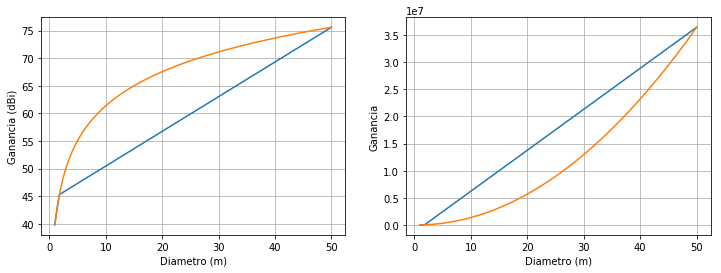

In [67]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(D_ajus,G_dB,diam,G_dB_ajus)
plt.ylabel("Ganancia (dBi)")
plt.xlabel("Diametro (m)")
plt.grid(b=True,which='both',axis='both')

plt.subplot(1,2,2)
plt.plot(D_ajus,G_l,diam,G_l_ajus)
plt.ylabel("Ganancia")
plt.xlabel("Diametro (m)")
plt.grid(b=True,which='both',axis='both')

plt.show()

Para la apertura, de manera similar, al observar las gráficas se pueden observar las siguientes características:

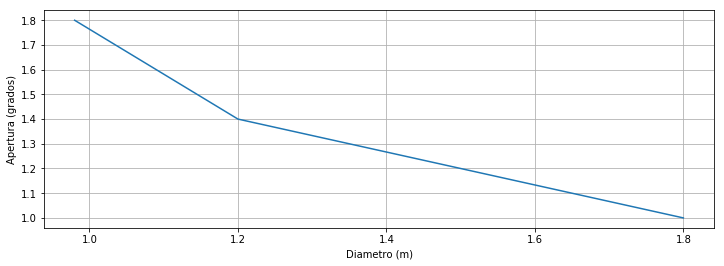

In [68]:
plt.figure(figsize=(12,4))

plt.plot(D,A)
plt.ylabel("Apertura (grados)")
plt.xlabel("Diametro (m)")
plt.grid(b=True,which='both',axis='both')

plt.show()

Para el caso de la apertura, el reflector de una antena correctamente diseñada debe concentrar el haz hacia una forma puntual, esto conforme la ganancia aumenta. Esto es, el valor angular tiende a cero, sin llegar a ser cero. Lo cual es característico de las funciones 1/x.

A las funciones con ajustes de orden potencial conviene convertirlas primero a una ecuación lineal para realizar un ajuste lineal, esto es:
$$
  y = a*x^b
$$
$$
  log(y) = log(a) + b*log(x)
$$

La apertura *vs* diámetro de antena sería:


In [69]:
D_log = np.log10(D)
A_log = np.log10(A)

A_log_poly = np.polyfit(D_log,A_log,1) # funcion de ajuste polinomial de orden 1

print(A_log_poly)
print("Ecuacion de ajuste: ({:.2f}) + ({:.2f}*x)".format(A_log_poly[1],A_log_poly[0]))

[-0.94717845  0.23662582]
Ecuacion de ajuste: (0.24) + (-0.95*x)


Se realiza la conversión inversa, de logaritmo a potencial:

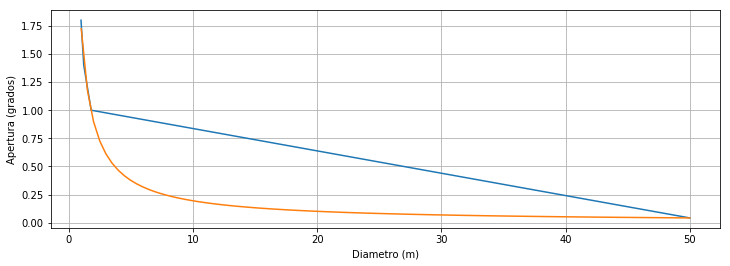

In [70]:
A_log_p = np.poly1d(A_log_poly)
A_log_ajus = np.append(A_log,A_log_p(np.log10(D_GTM)))

D_log_ajus = np.append(D_log,np.log10(D_GTM))

A_ajus = np.power(10,A_log_ajus)
D_ajus = np.power(10,D_log_ajus)

# Datos para gráfica de ajuste con 100 puntos
diam = np.linspace(1,D_GTM,100)
A_fit = np.power(10,A_log_p(np.log10(diam)))

plt.figure(figsize=(12,4))
plt.plot(D_ajus,A_ajus,diam,A_fit)
plt.ylabel("Apertura (grados)")
plt.xlabel("Diametro (m)")
plt.grid(b=True,which='both',axis='both')

plt.show()

In [71]:
print("Ángulo de apertura para antena de {:.2f} metros de diámetro: {:.2f} minutos".format(D_GTM,A_fit[-1]*60))

Ángulo de apertura para antena de 50.00 metros de diámetro: 2.54 minutos
